<a href="https://www.kaggle.com/code/gowthamramakrishnan/goldman-sachs-jpmorgan-chase-share-prices?scriptVersionId=132847355" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/The Goldman Sachs.csv
/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/JPMorgan Chase.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mpl_dates
import plotly.graph_objects as go

In [3]:
gs = pd.read_csv("/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/The Goldman Sachs.csv")
jpm = pd.read_csv("/kaggle/input/goldman-sachs-and-jpmorgan-chase-share-prices/JPMorgan Chase.csv")

In [4]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5863 non-null   object 
 1   Open       5863 non-null   float64
 2   High       5863 non-null   float64
 3   Low        5863 non-null   float64
 4   Close      5863 non-null   float64
 5   Adj Close  5863 non-null   float64
 6   Volume     5863 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 320.8+ KB


In [5]:
gs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,94.1875,94.3750,87.750,88.3125,65.690536,1822600
1,2000-01-04,87.0000,87.5000,82.250,82.7500,61.552921,1647700
2,2000-01-05,80.8750,81.8750,78.375,78.8750,58.670509,1516600
3,2000-01-06,78.6250,84.5000,78.625,82.2500,61.180992,1845100
4,2000-01-07,83.0625,83.1875,79.875,82.5625,61.413429,1127400


In [6]:
gs.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Combine the datasets
gs['Company'] = 'Goldman Sachs'
jpm['Company'] = 'JPMorgan Chase'
data = pd.concat([gs, jpm], ignore_index=True)

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2000-01-03,94.1875,94.3750,87.750,88.3125,65.690536,1822600,Goldman Sachs
1,2000-01-04,87.0000,87.5000,82.250,82.7500,61.552921,1647700,Goldman Sachs
2,2000-01-05,80.8750,81.8750,78.375,78.8750,58.670509,1516600,Goldman Sachs
3,2000-01-06,78.6250,84.5000,78.625,82.2500,61.180992,1845100,Goldman Sachs
4,2000-01-07,83.0625,83.1875,79.875,82.5625,61.413429,1127400,Goldman Sachs


In [9]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')


In [10]:
# Data Cleaning and Preprocessing
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

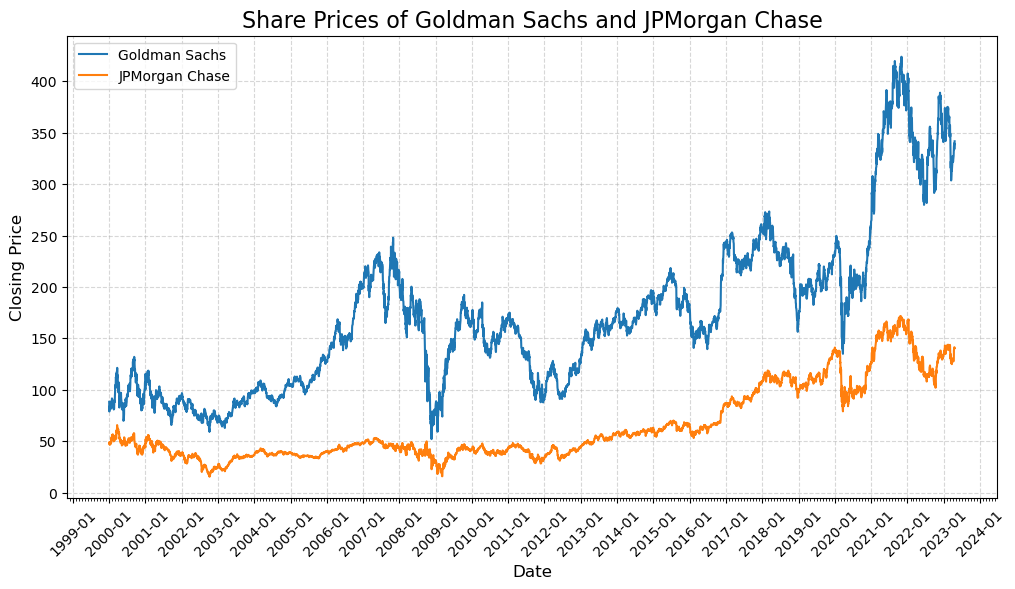

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Close', hue='Company')

# Set x-axis labels as year-month format
date_format = mpl_dates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mpl_dates.YearLocator())
plt.gca().xaxis.set_minor_locator(mpl_dates.MonthLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize plot aesthetics
plt.title('Share Prices of Goldman Sachs and JPMorgan Chase', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

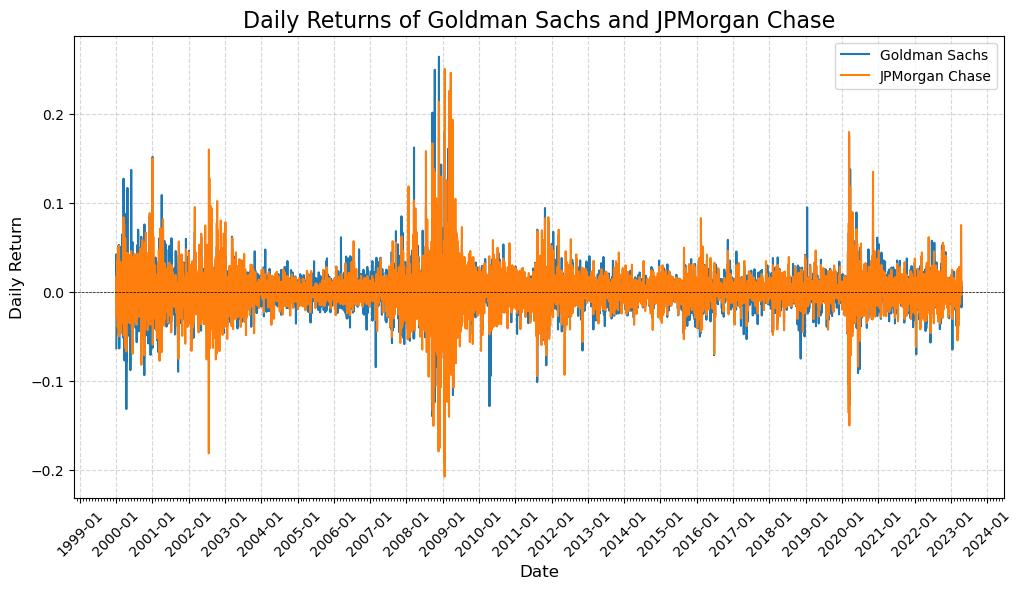

In [12]:
# Calculate daily returns
data['Daily Return'] = data.groupby('Company')['Close'].pct_change()

# Plotting the daily returns
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Daily Return', hue='Company')

# Set x-axis labels as year-month format
date_format = mpl_dates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mpl_dates.YearLocator())
plt.gca().xaxis.set_minor_locator(mpl_dates.MonthLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize plot aesthetics
plt.title('Daily Returns of Goldman Sachs and JPMorgan Chase', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.legend(fontsize=10)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [13]:
# Create candlestick chart
fig = go.Figure(data=go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))

fig.update_layout(title='Goldman Sachs and JPMorgan Chase Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

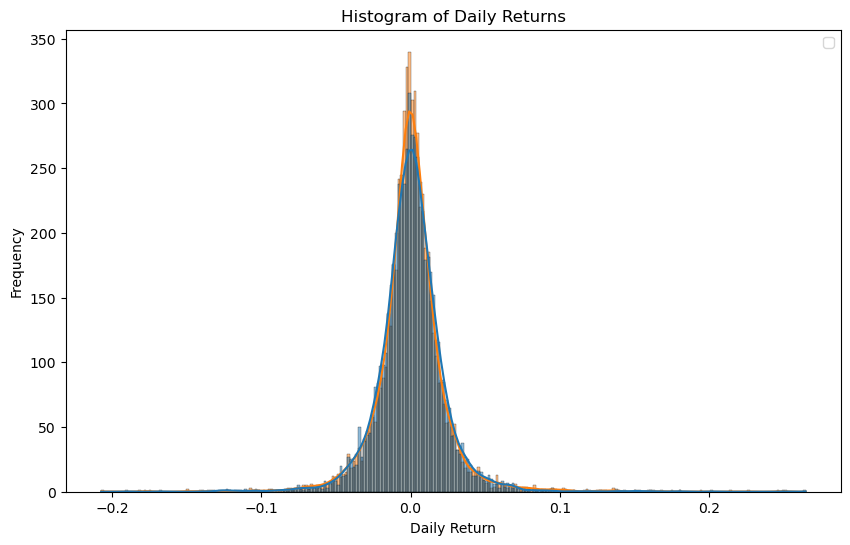

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Daily Return', hue='Company', kde=True)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

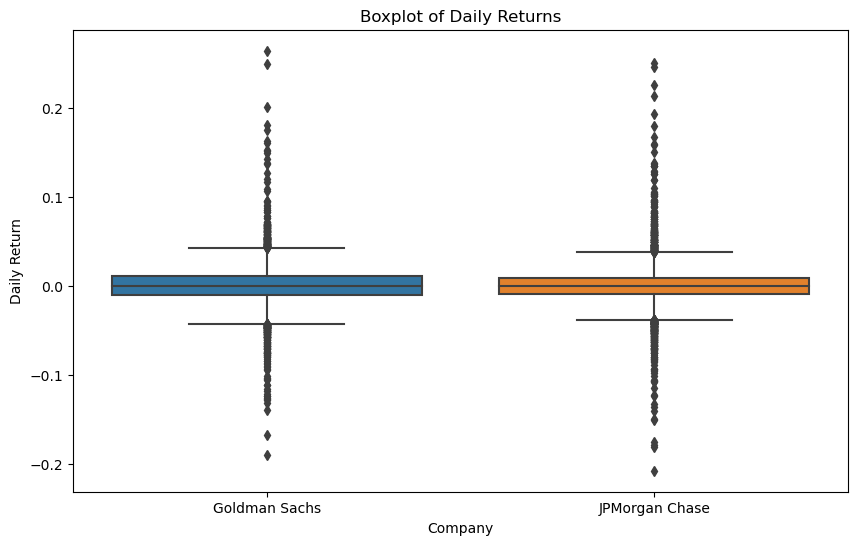

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Company', y='Daily Return')
plt.title('Boxplot of Daily Returns')
plt.xlabel('Company')
plt.ylabel('Daily Return')
plt.show()

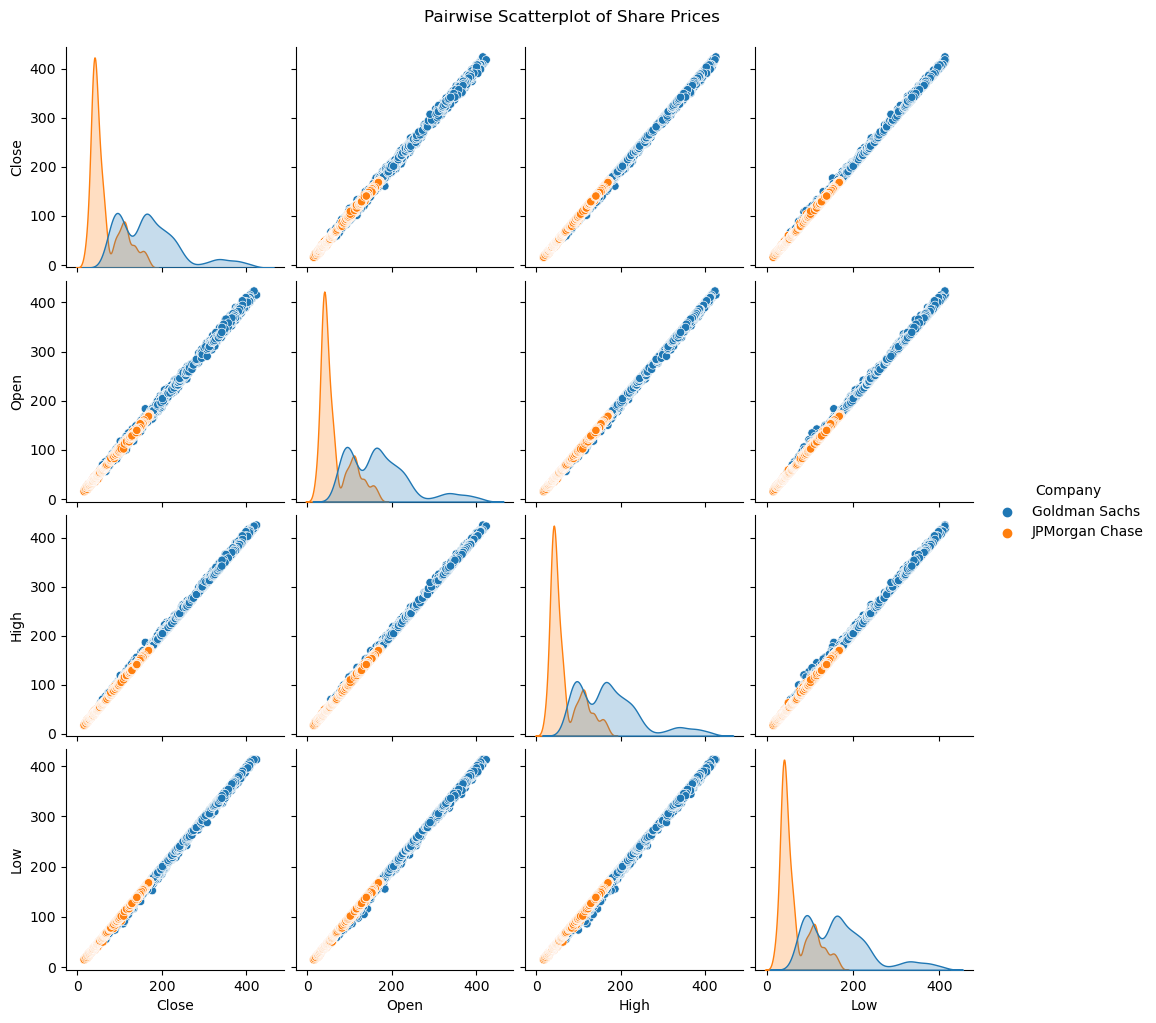

In [16]:
sns.pairplot(data=data, vars=['Close', 'Open', 'High', 'Low'], hue='Company')
plt.suptitle('Pairwise Scatterplot of Share Prices', y=1.02)
plt.show()

In [17]:
# Calculate the total profit for each company
data['Profit'] = (data['Close'] - data['Open']) * data['Volume']

# Group the data by company and calculate the sum of profits
profit_by_company = data.groupby('Company')['Profit'].sum()

# Find the company with the highest total profit
most_profitable_company = profit_by_company.idxmax()
most_profit = profit_by_company.max()

print(f"The company that made the most profit is {most_profitable_company} with a total profit of {most_profit:.2f}")

The company that made the most profit is JPMorgan Chase with a total profit of -491408673.61


In [18]:
# Prepare the data for regression
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Fit the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict on the test set
y_pred = reg_model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.8675026413109624
R-squared: 0.9998660073212942
